<a href="https://colab.research.google.com/github/shinchaeeun/deep-learning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B3%BC%EC%A0%9C1_2110196_%EC%8B%A0%EC%B1%84%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**딥러닝 과제1**

**기계시스템학부 2110196 신채은**

실습과제 1

In [ ]:
import torch

x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3) -> (1, 2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4) -> (4, 1, 1)로 변경가능 -> (4, 2, 3)
y = torch.zeros_like(x)

y = c.view(-1, 1, 1) + x

print('\nAddition x by a set of constants:')
print(y)


Additiony x by a set of constants:
tensor([[[  2,   3,   4],
         [  5,   6,   7]],

        [[ 11,  12,  13],
         [ 14,  15,  16]],

        [[ 12,  13,  14],
         [ 15,  16,  17]],

        [[101, 102, 103],
         [104, 105, 106]]])


실습과제 2

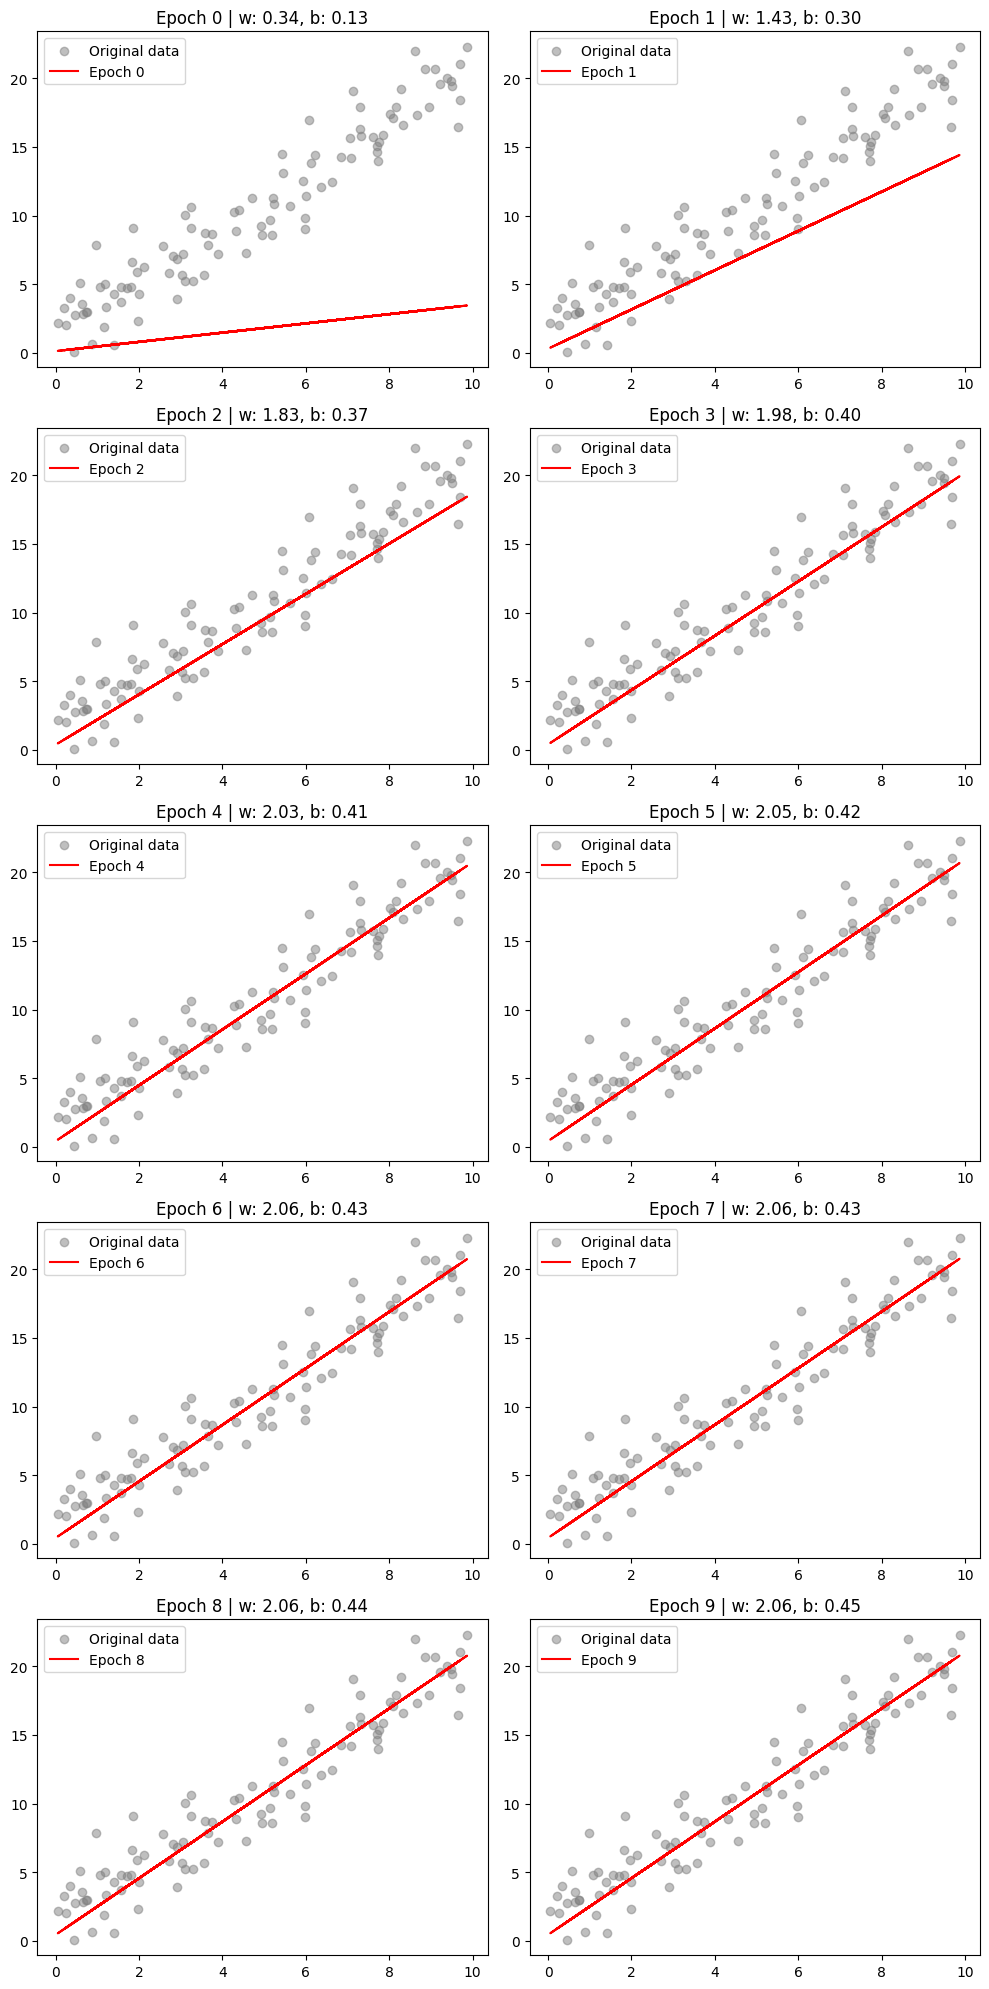

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
torch.manual_seed(42)

n_samples = 100
x = np.random.rand(n_samples, 1) * 10
y = 2 * x + 1 + np.random.randn(n_samples, 1) * 2

x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

w = torch.randn(1, dtype=torch.float32, requires_grad=False)
b = torch.randn(1, dtype=torch.float32, requires_grad=False)

lr = 0.01

epochs = 10

plt.figure(figsize=(10, 20))

for epoch in range(epochs):

    if (epoch+1) % 1 == 0:
        plt.subplot(5, 2, epoch+1)
        with torch.no_grad():
            predicted = w * x_train + b
            plt.scatter(x, y, label='Original data', color='grey', alpha=0.5)
            plt.plot(x, predicted.numpy(), label=f'Epoch {epoch}', color='red')
            plt.title(f'Epoch {epoch} | w: {w.item():.2f}, b: {b.item():.2f}')
            plt.legend()

    y_pred = w * x_train + b

    # l1 regularization 사용
    loss = (abs(y_pred - y_train)).mean()

    grad_w = 2.0 * (y_pred - y_train) * x_train
    grad_w = grad_w.mean()

    grad_b = 2.0 * (y_pred - y_train)
    grad_b = grad_b.mean()

    w -= lr * grad_w
    b -= lr * grad_b


plt.tight_layout()
plt.show()

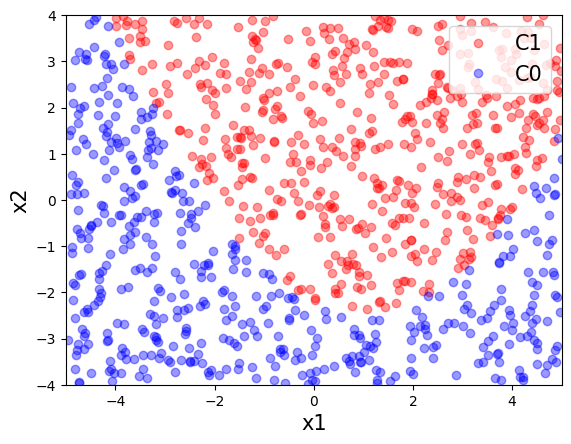

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.array(train_X)
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure()
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'x1', fontsize = 15)
plt.ylabel(r'x2', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

In [5]:
#data training
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
)

optimizer = optim.Adam(model.parameters(), lr=0.1)

loss_function = nn.BCELoss()

train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y).view(-1, 1)


for epoch in range(100):
    optimizer.zero_grad()
    output = model(train_X_tensor)
    loss = loss_function(output, train_y_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.7657353281974792
Epoch 2, Loss: 0.7159975171089172
Epoch 3, Loss: 0.6878220438957214
Epoch 4, Loss: 0.675125002861023
Epoch 5, Loss: 0.6680693626403809
Epoch 6, Loss: 0.6607833504676819
Epoch 7, Loss: 0.6520256400108337
Epoch 8, Loss: 0.6423357725143433
Epoch 9, Loss: 0.6322321891784668
Epoch 10, Loss: 0.6215847134590149
Epoch 11, Loss: 0.6098000407218933
Epoch 12, Loss: 0.5963728427886963
Epoch 13, Loss: 0.581173837184906
Epoch 14, Loss: 0.5644763112068176
Epoch 15, Loss: 0.5469257831573486
Epoch 16, Loss: 0.5293914675712585
Epoch 17, Loss: 0.5126842856407166
Epoch 18, Loss: 0.4973261058330536
Epoch 19, Loss: 0.48351070284843445
Epoch 20, Loss: 0.4712047278881073
Epoch 21, Loss: 0.4602658450603485
Epoch 22, Loss: 0.4505208730697632
Epoch 23, Loss: 0.44181132316589355
Epoch 24, Loss: 0.43401604890823364
Epoch 25, Loss: 0.42705583572387695
Epoch 26, Loss: 0.4208843410015106
Epoch 27, Loss: 0.41547417640686035
Epoch 28, Loss: 0.41080164909362793
Epoch 29, Loss: 0.4068344

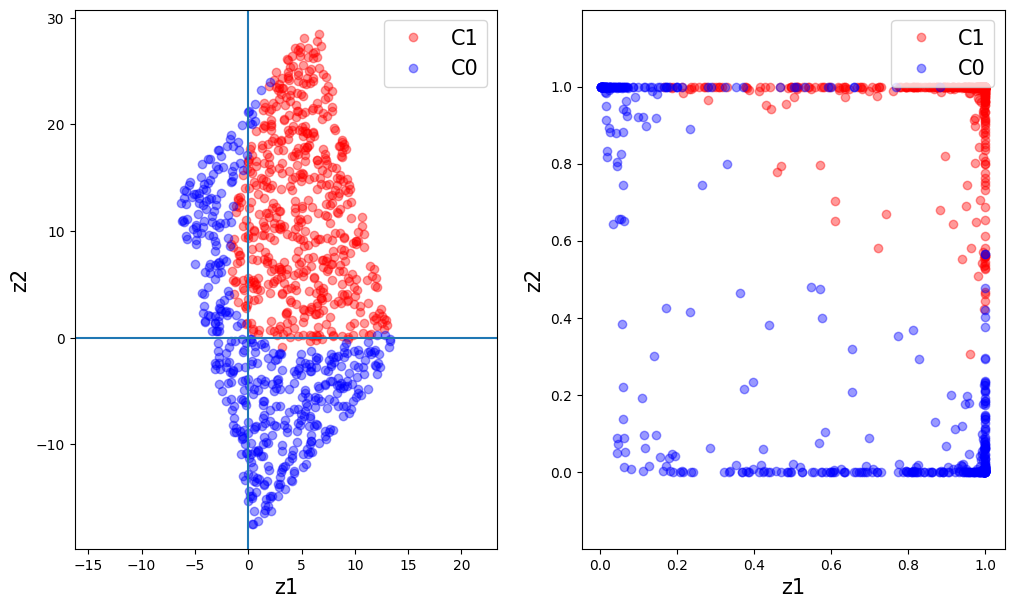

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt


w1, b1 = model[0].weight.data.numpy(), model[0].bias.data.numpy()
w2, b2 = model[2].weight.data.numpy(), model[2].bias.data.numpy()

X = train_X

logits = np.dot(X, w1.T) + b1

H = 1 / (1 + np.exp(-logits))  #sigmoid 씌우기

# Plotting
plt.figure(figsize=(12, 7))

plt.subplot(121)
plt.plot(logits[:N, 0], logits[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(logits[N:m, 0], logits[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[:N, 0], H[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(H[N:m, 0], H[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.show()

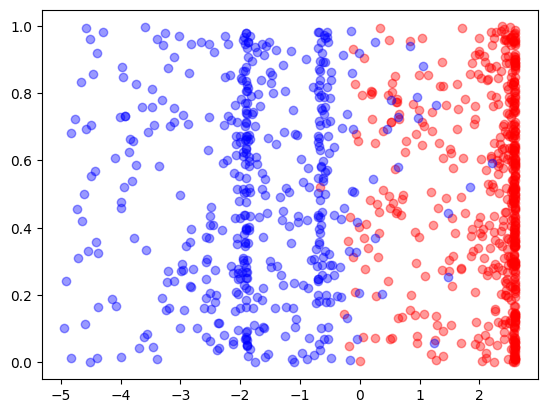

In [7]:
z = w2[0,0]*H[:,0] + w2[0,1]*H[:,1] + b2[0]

plt.figure()
plt.plot(z[0:N], np.random.rand(N), 'ro', alpha = 0.4, label = 'C1')
plt.plot(z[N:m], np.random.rand(m-N), 'bo', alpha = 0.4, label = 'C0')

plt.show()

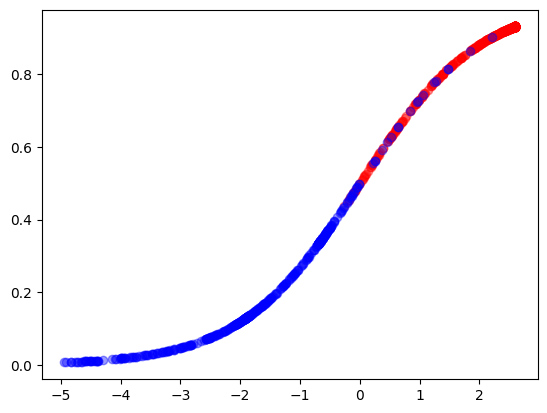

In [8]:
s = 1 / (1 + np.exp(-z))

plt.figure()
plt.plot(z[0:N], s[0:N], 'ro', alpha = 0.4, label = 'C1')
plt.plot(z[N:m], s[N:m], 'bo', alpha = 0.4, label = 'C0')

plt.show()

실습과제 3

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# 학습시키는 활성화함수로 tanh 사용!
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
    nn.Tanh(),
    nn.Linear(in_features=2, out_features=1),
    nn.Sigmoid()
)

optimizer = optim.Adam(model.parameters(), lr=0.1)

loss_function = nn.BCELoss()

train_X_tensor = torch.FloatTensor(train_X)
train_y_tensor = torch.FloatTensor(train_y).view(-1, 1)

for epoch in range(100):
    optimizer.zero_grad()
    output = model(train_X_tensor)
    loss = loss_function(output, train_y_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.7262755036354065
Epoch 2, Loss: 0.6802797317504883
Epoch 3, Loss: 0.6456161141395569
Epoch 4, Loss: 0.6119254231452942
Epoch 5, Loss: 0.5760517120361328
Epoch 6, Loss: 0.5388638377189636
Epoch 7, Loss: 0.5016665458679199
Epoch 8, Loss: 0.46610644459724426
Epoch 9, Loss: 0.43382763862609863
Epoch 10, Loss: 0.40618643164634705
Epoch 11, Loss: 0.38407665491104126
Epoch 12, Loss: 0.3675079345703125
Epoch 13, Loss: 0.3553040623664856
Epoch 14, Loss: 0.3457886278629303
Epoch 15, Loss: 0.33781698346138
Epoch 16, Loss: 0.3310450315475464
Epoch 17, Loss: 0.3253638446331024
Epoch 18, Loss: 0.32016289234161377
Epoch 19, Loss: 0.3144955039024353
Epoch 20, Loss: 0.3078967034816742
Epoch 21, Loss: 0.3006815016269684
Epoch 22, Loss: 0.29363006353378296
Epoch 23, Loss: 0.2872513234615326
Epoch 24, Loss: 0.28119754791259766
Epoch 25, Loss: 0.27509233355522156
Epoch 26, Loss: 0.2695944309234619
Epoch 27, Loss: 0.26542291045188904
Epoch 28, Loss: 0.2621217668056488
Epoch 29, Loss: 0.2587

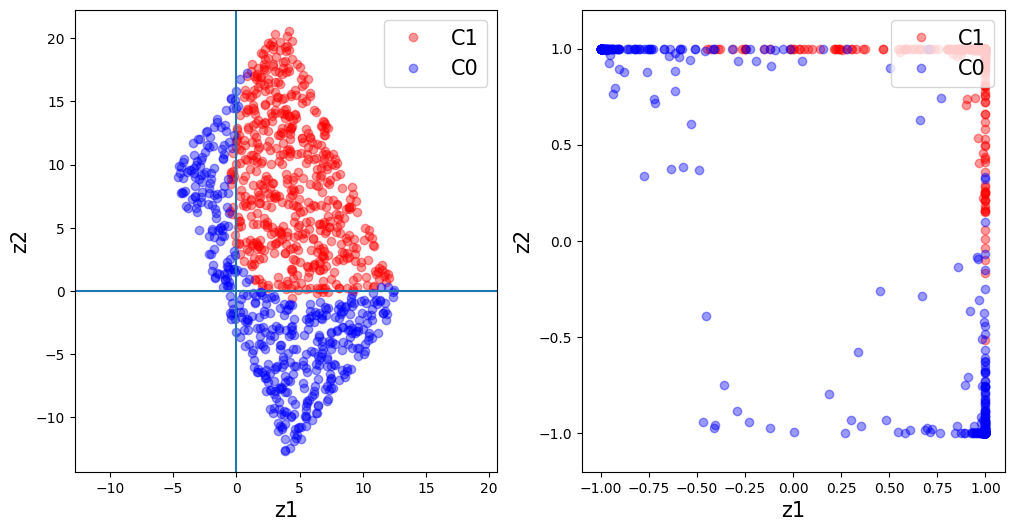

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt


w1, b1 = model[0].weight.data.numpy(), model[0].bias.data.numpy()
w2, b2 = model[2].weight.data.numpy(), model[2].bias.data.numpy()

X = train_X

logits = np.dot(X, w1.T) + b1

# Applying the tanh function
H = np.tanh(logits)

# 플로팅
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(logits[:N, 0], logits[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(logits[N:m, 0], logits[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')
plt.axhline(0)
plt.axvline(0)

plt.subplot(122)
plt.plot(H[:N, 0], H[:N, 1], 'ro', alpha=0.4, label='C1')
plt.plot(H[N:m, 0], H[N:m, 1], 'bo', alpha=0.4, label='C0')
plt.xlabel('z1', fontsize=15)
plt.ylabel('z2', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.axis('equal')

plt.show()

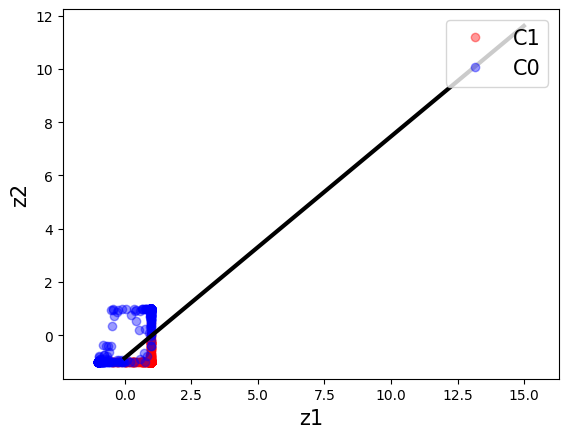

In [11]:
x1p = np.arange(0, 15, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[0,1]*x1p - b2[0]/w2[0,1]

plt.figure()
plt.plot(H[0:N,0], H[0:N,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, 'k', linewidth = 3, label = '')
plt.xlabel('z1', fontsize = 15)
plt.ylabel('z2', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.show()

실습과제 4

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


# Device 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

print("Training with Hinge Loss:")
model = MLP()

#  loss 함수 및 optimizer 정의
criterion = nn.MultiMarginLoss()  # Hinge Loss (SVM Loss) 사용
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 모델 학습
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')

Training with Hinge Loss:
Epoch 1, Loss: 0.018411891534924507
Epoch 2, Loss: 0.0016694668447598815
Epoch 3, Loss: 0.00160854565910995
Epoch 4, Loss: 0.005930747836828232
Epoch 5, Loss: 0.006708689033985138
Epoch 6, Loss: 0.008360380306839943
Epoch 7, Loss: 0.0032524443231523037
Epoch 8, Loss: 0.016422271728515625
Epoch 9, Loss: 0.003682567272335291
Epoch 10, Loss: 0.0029787318781018257
Accuracy: 97.77%


실습과제 5

In [23]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Device 설정
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 데이터 전처리 및 로드
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 모델 파라미터 초기화
fc1_weight = torch.randn(28*28, 100, device=device, requires_grad=True)
fc1_bias = torch.zeros((100), device=device, requires_grad=True)
fc2_weight = torch.randn(100, 10, device=device, requires_grad=True)
fc2_bias = torch.zeros(10, device=device, requires_grad=True)

# 모델 학습
epochs = 10
lr = 0.01
momentum = 0.9
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # Forward pass
        x = inputs.view(-1, 28*28)
        x = F.relu(x @ fc1_weight + fc1_bias)
        x = x @ fc2_weight + fc2_bias

        # Hinge loss 계산
        loss = F.multi_margin_loss(x, labels)

        # Backward pass 및 가중치 업데이트
        loss.backward()
        with torch.no_grad():
            fc1_weight -= lr * fc1_weight.grad
            fc1_bias -= lr * fc1_bias.grad
            fc2_weight -= lr * fc2_weight.grad
            fc2_bias -= lr * fc2_bias.grad

            # Zero gradients
            fc1_weight.grad.zero_()
            fc1_bias.grad.zero_()
            fc2_weight.grad.zero_()
            fc2_bias.grad.zero_()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}')

# Evaluation loop
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = F.relu(images.view(-1, 28*28) @ fc1_weight + fc1_bias)
        outputs = outputs @ fc2_weight + fc2_bias
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}%')

Epoch 1, Loss: 8.288741838639734
Epoch 2, Loss: 2.888101590086402
Epoch 3, Loss: 2.141280391005311
Epoch 4, Loss: 1.7464648297886605
Epoch 5, Loss: 1.4901331449503392
Epoch 6, Loss: 1.3066296057640585
Epoch 7, Loss: 1.1664583777575923
Epoch 8, Loss: 1.0521522260296827
Epoch 9, Loss: 0.9597548666968148
Epoch 10, Loss: 0.8830886438115637
Accuracy: 86.88%


실습과제 6

In [24]:
#in CPU (2초)

import torch

def batched_matrix_multiply_loop(x,w):
    z = torch.zeros(x.shape[0], x.shape[1], w.shape[2])
    for i, (xi, wi) in enumerate(zip(x,w)):
      z[i] = torch.mm(xi,wi)
    return z

def batched_matrix_multiply_noloop(x,w):
    z = torch.bmm(x, w)
    return z

x = torch.randn(2, 512, 4096)
w = torch.randn(2, 4096, 4096)
z_expected = torch.stack([torch.mm(x[0], w[0]), torch.mm(x[1], w[1])])

z1 = batched_matrix_multiply_loop(x, w)
z2 = batched_matrix_multiply_noloop(x, w)
z1, z2, z_expected

(tensor([[[  -6.6553,    4.8253,   38.3723,  ...,   26.4530,  -50.8368,
            -47.9868],
          [ -13.0287,  -41.8225,   28.5322,  ...,   63.2806,   57.2120,
             35.3885],
          [ -98.7000,   85.5676,  105.4317,  ...,  -25.2071,   28.4134,
             15.3682],
          ...,
          [  44.4515,  -29.2406,   68.3545,  ...,   75.0784,   48.6977,
             88.7902],
          [ 104.2888,   -3.1667,   34.4094,  ...,   88.7391,   16.7228,
            -82.6843],
          [  -4.1849,  -57.9116,  -82.6884,  ...,  -11.9697,    8.4766,
           -125.8288]],
 
         [[ -67.3566,   99.6354,   82.1083,  ...,  -28.5108,   79.6369,
             14.5142],
          [ -48.6540,  -42.5495,   16.9287,  ...,   54.5026,  -30.7876,
            -83.7414],
          [  15.9689,   17.3568,  -15.7917,  ...,  -58.1935,   17.4974,
             52.0273],
          ...,
          [  11.2774,   23.1384,  -26.6853,  ...,   28.4905,   -0.7848,
             -1.1237],
          [  23.1

In [ ]:
#in GPU (17초)

import torch

device = torch.device("cuda") #GPU로 전환

def batched_matrix_multiply_loop(x,w):
    z = torch.zeros(x.shape[0], x.shape[1], w.shape[2])
    for i, (xi, wi) in enumerate(zip(x,w)):
      z[i] = torch.mm(xi,wi)
    return z

def batched_matrix_multiply_noloop(x,w):
    z = torch.bmm(x, w)
    return z

x = torch.randn(2, 512, 4096)
w = torch.randn(2, 4096, 4096)
z_expected = torch.stack([torch.mm(x[0], w[0]), torch.mm(x[1], w[1])])

z1 = batched_matrix_multiply_loop(x, w)
z2 = batched_matrix_multiply_noloop(x, w)
z1, z2, z_expected

(tensor([[[ -39.4672,   95.8973,  -67.9838,  ...,  -76.2891,   72.7424,
              6.1701],
          [   2.5313,   10.1322,   49.8983,  ...,  -88.6084,   -2.1020,
             28.7178],
          [ -23.5345,   30.7343,  -35.6346,  ...,   44.5552,   11.1472,
            -11.7349],
          ...,
          [ -27.3049,  -65.0184,  -66.0342,  ...,   27.5738,   -2.8790,
            108.5451],
          [ 124.2393,   -6.2052,   35.9757,  ...,   22.0658,  -13.2893,
            -37.6494],
          [ -53.1446,  115.3388,   80.2021,  ...,  102.5863,  -68.0322,
             10.4929]],
 
         [[-188.8350,    8.4488,  -12.1371,  ...,   42.4382,   43.9466,
             -7.0604],
          [ -43.2261,  -50.5608,  -72.0145,  ...,    3.6640,  -39.9585,
             63.5550],
          [  43.9264,   67.8419,  -18.4772,  ..., -108.1454,   14.1323,
            -81.9303],
          ...,
          [  19.7217,   92.2702,   -9.1625,  ...,  -14.0252,    2.7183,
             58.9640],
          [-118.3

실습과제 7

Files already downloaded and verified
Epoch [1/5], Loss: 1.9982325526149682
Epoch [2/5], Loss: 1.872572694745515
Epoch [3/5], Loss: 1.8344353310897221
Epoch [4/5], Loss: 1.812461971321984
Epoch [5/5], Loss: 1.7968165830273153


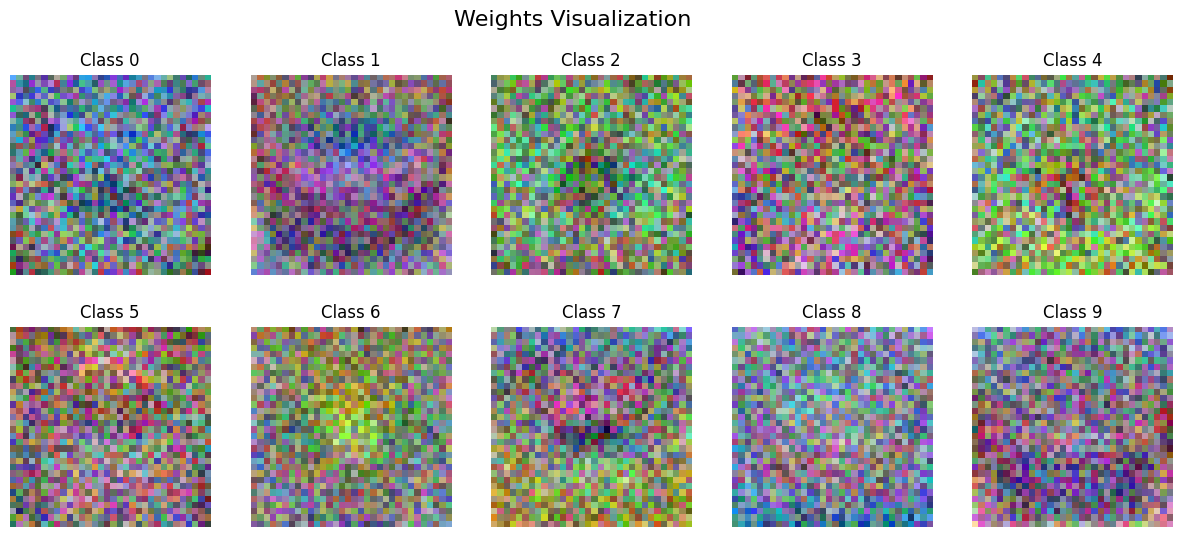

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# 클래스 레이블
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Logistic Regression 모델 정의
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.linear(x)
        return out

# 모델 초기화
model = LogisticRegression(input_size=3*32*32, num_classes=10)

# 디바이스 설정 (GPU 사용 가능하면 GPU 사용, 그렇지 않으면 CPU 사용)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# 손실 함수와 optimizer 정의
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}')

# 학습된 가중치 가져오기
weights = model.linear.weight.detach().cpu().numpy()

# 가중치 시각화
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Weights Visualization', fontsize=16)

for i in range(10):
    weight_img = weights[i].reshape(3, 32, 32)
    weight_img = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min())  # Adjusting values to [0, 1]
    ax = axs[i // 5, i % 5]
    ax.imshow(weight_img.transpose(1, 2, 0))
    ax.axis('off')
    ax.set_title(f'Class {i}')

plt.show()

Files already downloaded and verified
Epoch [1/5], Loss: 1.787747419703647
Epoch [2/5], Loss: 1.788445494668868
Epoch [3/5], Loss: 1.7877707606386346
Epoch [4/5], Loss: 1.7879384957311097
Epoch [5/5], Loss: 1.7881089624236612


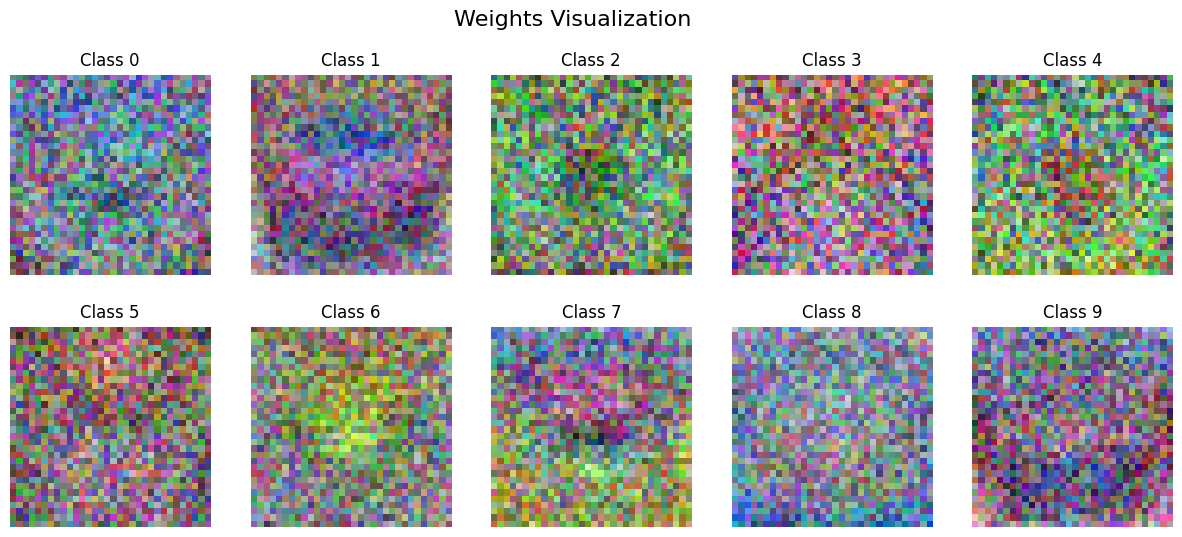

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# CIFAR-10 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

# 클래스 레이블
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 신경망 정의
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = ANN()

# 손실 함수 및 optimizer 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}')

# 학습된 가중치 가져오기
weights = model.linear.weight.detach().cpu().numpy()

# 가중치 시각화
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Weights Visualization', fontsize=16)

for i in range(10):
    weight_img = weights[i].reshape(3, 32, 32)
    weight_img = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min())  # Adjusting values to [0, 1]
    ax = axs[i // 5, i % 5]
    ax.imshow(weight_img.transpose(1, 2, 0))
    ax.axis('off')
    ax.set_title(f'Class {i}')

plt.show()